<a href="https://colab.research.google.com/github/NiyonshutiDavid/Intro2ML_Summative/blob/main/Summative_Intro_to_ml_%5BDavid%20Niyonshuti%5D_assignment_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




# The Dataset
> ***Brief Description:***
**Problem Statement**
Despite Rwanda's impressive agricultural development initiatives, smallholder farmers continue to face significant challenges in identifying and managing crop diseases effectively. Current approaches to crop disease management are inadequate for several reasons:

1. Limited Extension Services: Musabyimana et al. (2023) highlighted that Rwanda's extension officer-to-farmer ratio stands at 1:1,400, severely limiting timely access to expert diagnosis when disease symptoms first appear. Their research revealed that farmers typically wait 7-12 days for an extension officer visit, by which time disease spread often becomes unmanageable.
2. Knowledge Gaps: Niyonzima and Habimana (2022) conducted surveys across Rwanda's Eastern Province, finding that only 31% of smallholder farmers could correctly identify common diseases affecting their crops beyond basic visual recognition. The study emphasized how this knowledge gap leads to inappropriate treatment applications, contributing to both economic losses and environmental harm.
3. Connectivity Barriers: Uwamahoro and Bizimana (2023) analyzed technological interventions in Rwandan agriculture, noting that while existing digital solutions show promise, they predominantly require consistent internet connectivity. With only 17% of rural farming areas having reliable internet access, solutions requiring constant connectivity fail to serve the majority of Rwanda's agricultural communities.
4. Cultural and Language Limitations: Mukamana et al. (2024) demonstrated that existing agricultural advisory apps fail to account for linguistic diversity and literacy levels among Rwandan farmers. Their research showed that solutions not incorporating Kinyarwanda and visual interfaces see adoption rates below 8% among target communities.
5. RwandaCropGuard addresses these limitations by developing a locally-adapted, offline-capable classification system specifically designed for Rwandan crops, languages, and farming contexts. Unlike existing solutions that require consistent connectivity or fail to accommodate local varieties and diseases, our approach focuses on creating an accessible, culturally appropriate system that empowers smallholder farmers with immediate diagnostic capabilities.


In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop , SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib


In [2]:
# lOAD THE DATA
data = pd.read_csv('big_startup_secsees_dataset.csv')
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


## Data preprocessing and engineering

In [3]:
print("Dataset description:")
print(data.describe())
print("\n Total rows and columns in the dataset:", data.shape)
data.info()

Dataset description:
       funding_rounds
count    66368.000000
mean         1.732522
std          1.360251
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000

 Total rows and columns in the dataset: (66368, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  fou

In [4]:
# Check for missing values
print(data.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


In [5]:
# Data Cleaning
# Convert 'funding_total_usd' to numeric, handling non-numeric characters
# Convert date columns to datetime, handling errors
# Handle missing values in 'name', 'category_list', and geographical columns
print("\n--- Data Cleaning Process ---")
# --- 1. Handle 'funding_total_usd' column ---
data['funding_total_usd'] = data['funding_total_usd'].astype(str).str.replace(r'[$,\s]', '', regex=True)
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')
print(f"Data type of 'funding_total_usd' after conversion: {data['funding_total_usd'].dtype}")
print(f"Missing values in 'funding_total_usd' after conversion: {data['funding_total_usd'].isnull().sum()}")

# --- 2. Handle Date Columns ---
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    # Convert to datetime, coercing errors to NaT (Not a Time)
    data[col] = pd.to_datetime(data[col], errors='coerce')
    print(f"Data type of '{col}' after conversion: {data[col].dtype}")
    print(f"Missing values (NaT) in '{col}' after conversion: {data[col].isnull().sum()}")

# --- 3. Handle Other Missing Data ---

# 'name': Drop rows with missing 'name' (only 1 missing, unlikely to lose much data)
if data['name'].isnull().sum() > 0:
    data.dropna(subset=['name'], inplace=True)
    print(f"Dropped rows with missing 'name'. Remaining rows: {len(data)}")


# 'homepage_url': Fill with 'Unknown_Homepage'
data['homepage_url'].fillna('Unknown_Homepage', inplace=True)

# 'category_list': Fill with 'Unknown_Category'
data['category_list'].fillna('Unknown_Category', inplace=True)

# Geographical Columns: Fill with 'Unknown_ColumnName'
geo_cols = ['country_code', 'state_code', 'region', 'city']
for col in geo_cols:
    data[col].fillna(f'Unknown_{col}', inplace=True)

# No general dropna(inplace=True) here to preserve rows with other missing values
# We will handle NaNs in 'funding_total_usd' and date columns specifically after classification

# --- Final Check ---
print("\n--- Data Cleaning Summary ---")
print("Missing values after initial cleaning (before targeted handling):")
print(data.isnull().sum())
print("\nData types after cleaning:")
print(data.dtypes)
print(f"\nDataFrame shape after initial cleaning: {data.shape}")
print("\nFirst few rows of the cleaned dataset:")
data.head()


--- Data Cleaning Process ---
Data type of 'funding_total_usd' after conversion: float64
Missing values in 'funding_total_usd' after conversion: 12785
Data type of 'founded_at' after conversion: datetime64[ns]
Missing values (NaT) in 'founded_at' after conversion: 15225
Data type of 'first_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'first_funding_at' after conversion: 27
Data type of 'last_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'last_funding_at' after conversion: 0
Dropped rows with missing 'name'. Remaining rows: 66367

--- Data Cleaning Summary ---
Missing values after initial cleaning (before targeted handling):
permalink                0
name                     0
homepage_url             0
category_list            0
funding_total_usd    12785
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15

<ipython-input-5-3805791938>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['homepage_url'].fillna('Unknown_Homepage', inplace=True)
<ipython-input-5-3805791938>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaT,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [6]:
# --- Data Preparation for Classification ---
# --- Company Classification Based on Funding Status ---
# Define the conditions for each class
# We process 'Rejected' first as it's a definitive end-state,
# then 'Funding Eligible' as it signifies success/readiness,
# and finally 'Mentorship Needed' as the default for active but unfunded companies.

conditions = [
    # 1. Rejected
    (data['status'] == 'closed'),

    # 2. Funding Eligible
    (data['status'] == 'acquired') |
    ((data['status'] == 'operating') & (data['funding_total_usd'] > 0)),

    # 3. Mentorship Needed
    # This captures 'operating' companies with 0 or NaN funding_total_usd
    ((data['status'] == 'operating') & ((data['funding_total_usd'] == 0) | (data['funding_total_usd'].isnull())))
]

# Define the corresponding values for each class
choices = ['Rejected', 'Funding Eligible', 'Mentorship Needed']

# Apply the conditions to create the new 'funding_class' column
# Any rows not fitting these conditions (e.g., if there are other 'status' types)
# will be assigned 'Other' or can be left as NaN if you prefer.
data['funding_class'] = np.select(conditions, choices, default='Unclassified')

# --- Verification and Summary ---
print("--- Company Classification Summary ---")
print("\nDistribution of Companies by Funding Class:")
print(data['funding_class'].value_counts())

print("\nCharacteristics of each class (based on defined criteria):")

print("\n1. Rejected Class:")
rejected_companies = data[data['funding_class'] == 'Rejected']
print(f"  - Count: {len(rejected_companies)}")
print(f"  - Status Distribution:\n{rejected_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {rejected_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {rejected_companies['funding_rounds'].mean():.2f}")


print("\n2. Funding Eligible Class:")
eligible_companies = data[data['funding_class'] == 'Funding Eligible']
print(f"  - Count: {len(eligible_companies)}")
print(f"  - Status Distribution:\n{eligible_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {eligible_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {eligible_companies['funding_rounds'].mean():.2f}")


print("\n3. Mentorship Needed Class:")
mentorship_companies = data[data['funding_class'] == 'Mentorship Needed']
print(f"  - Count: {len(mentorship_companies)}")
print(f"  - Status Distribution:\n{mentorship_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {mentorship_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {mentorship_companies['funding_rounds'].mean():.2f}")

# Optional: Check if any companies were 'Unclassified'
if 'Unclassified' in data['funding_class'].unique():
    print(f"\nUnclassified companies count: {data['funding_class'].value_counts().get('Unclassified', 0)}")
    print("These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentorship Needed.")

--- Company Classification Summary ---

Distribution of Companies by Funding Class:
funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Unclassified          1547
Name: count, dtype: int64

Characteristics of each class (based on defined criteria):

1. Rejected Class:
  - Count: 6237
  - Status Distribution:
status
closed    6237
Name: count, dtype: int64
  - Avg Funding Total USD: 10,900,158.94
  - Avg Funding Rounds: 1.40

2. Funding Eligible Class:
  - Count: 47989
  - Status Distribution:
status
operating    42440
acquired      5549
Name: count, dtype: int64
  - Avg Funding Total USD: 15,385,288.02
  - Avg Funding Rounds: 1.88

3. Mentorship Needed Class:
  - Count: 10594
  - Status Distribution:
status
operating    10594
Name: count, dtype: int64
  - Avg Funding Total USD: nan
  - Avg Funding Rounds: 1.12

Unclassified companies count: 1547
These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentor

In [7]:
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaT,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


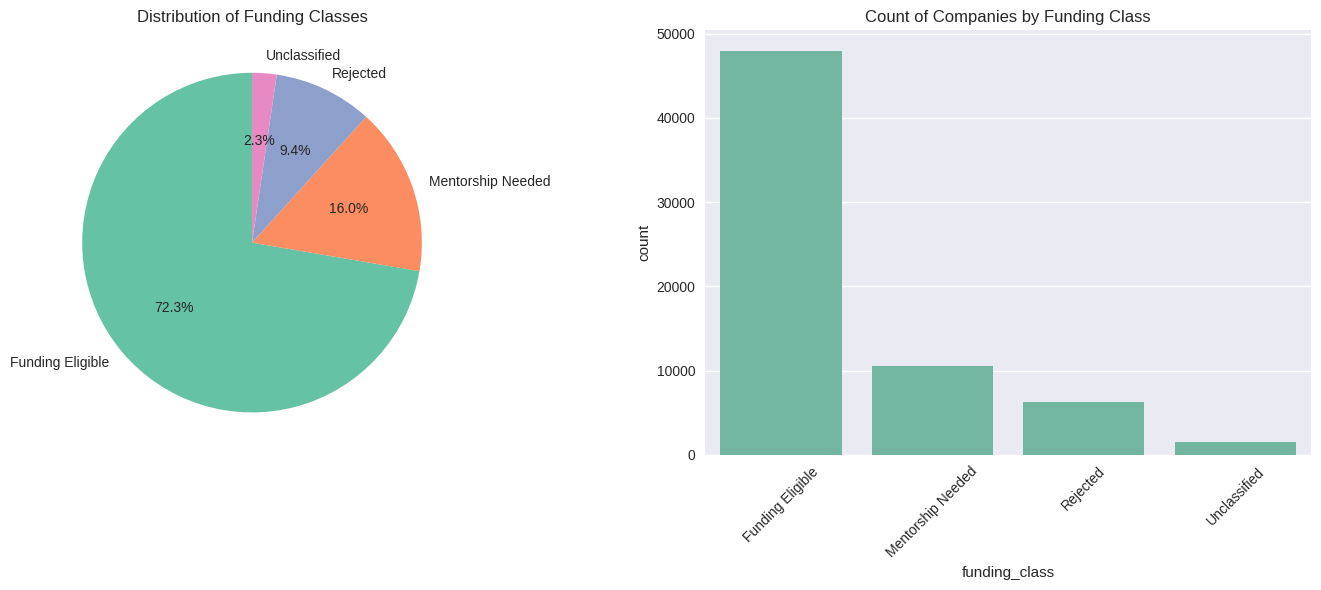

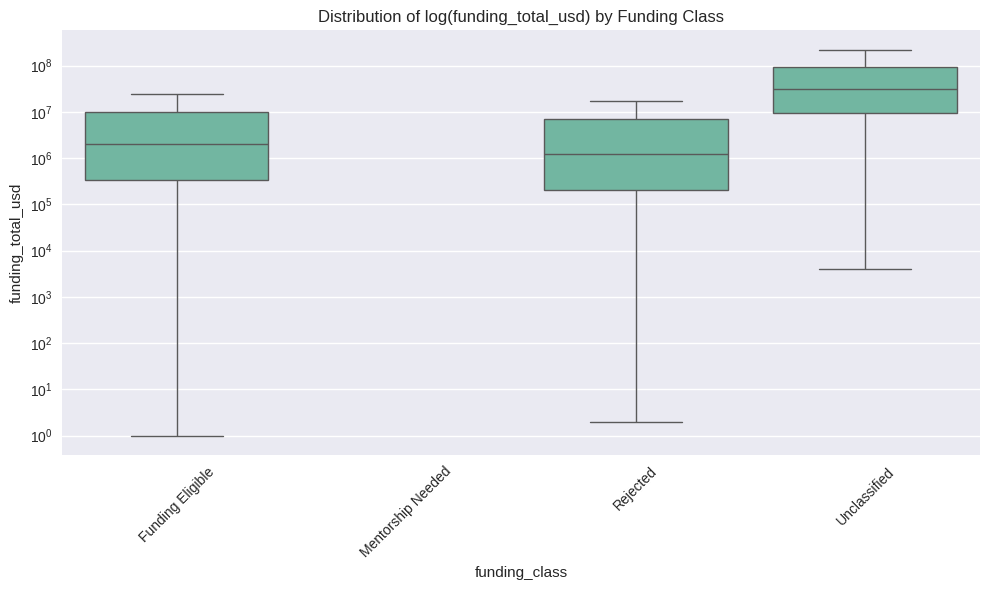

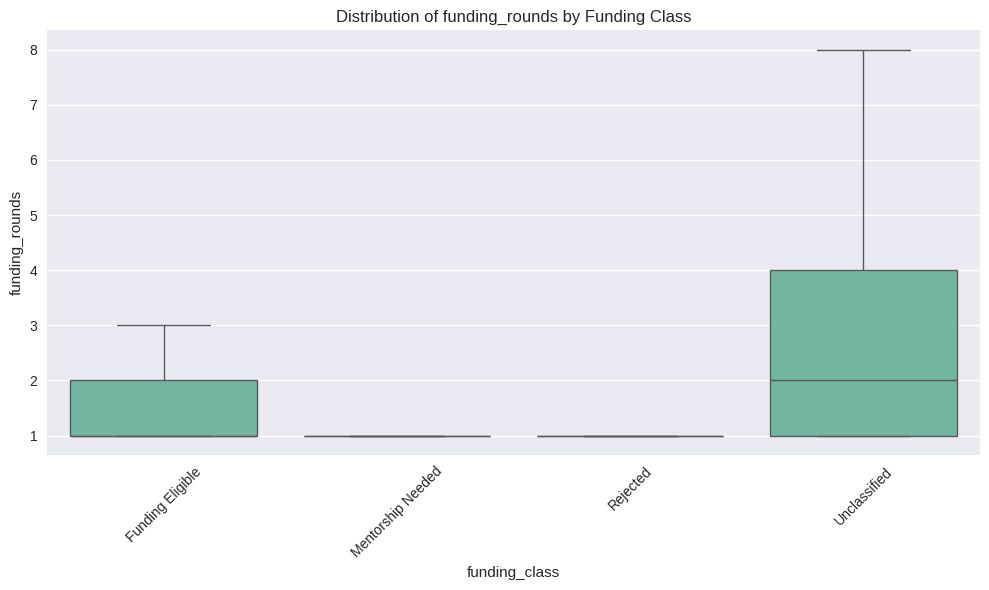

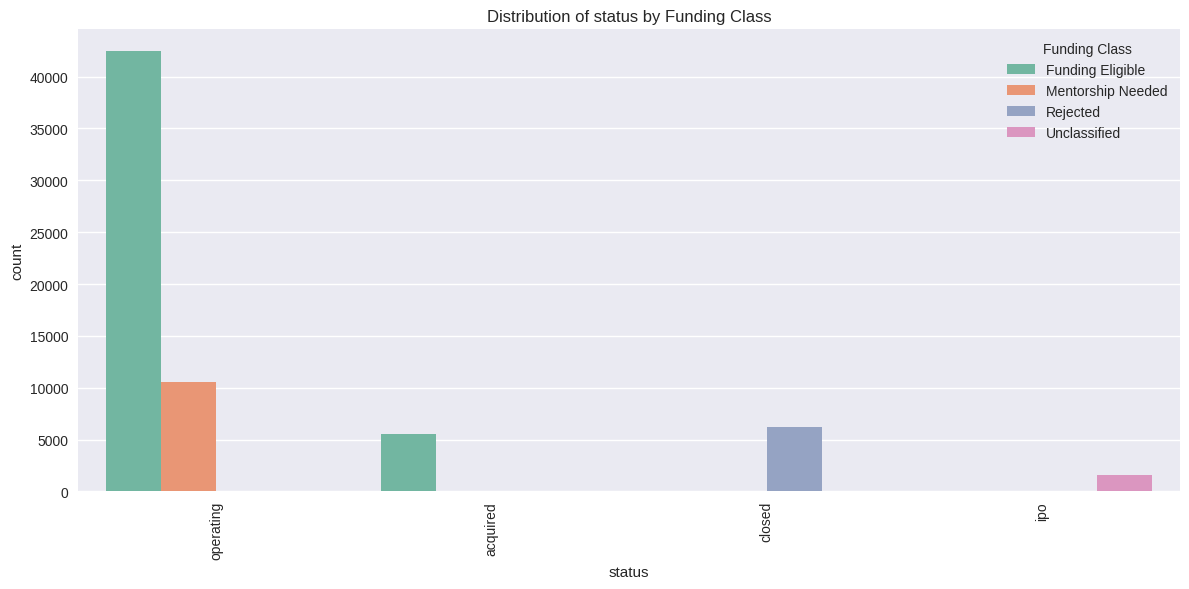

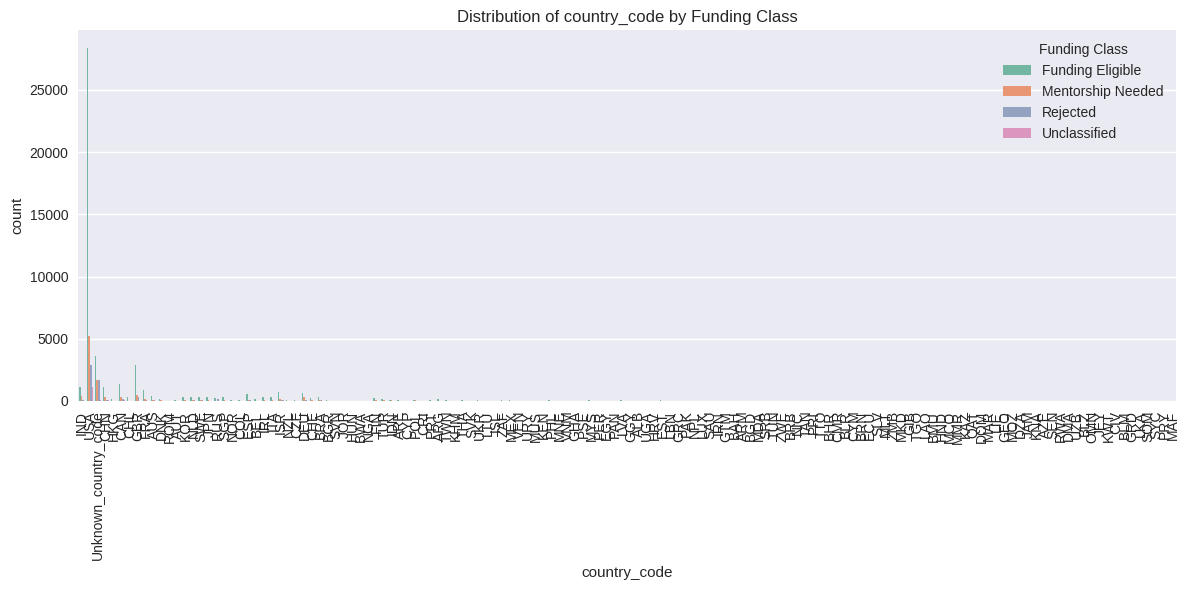

<ipython-input-8-1599835277>:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-8-1599835277>:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [8]:

# Visualization of the dataset
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# 1. Distribution of Funding Classes (Pie Chart and Bar Plot)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
data['funding_class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Funding Classes')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='funding_class', order=data['funding_class'].value_counts().index)
plt.title('Count of Companies by Funding Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribution of Numerical Features by Funding Class
# Only use features that exist in the DataFrame
num_features = [col for col in ['funding_total_usd', 'funding_rounds', 'milestones', 'relationships'] if col in data.columns]
for feature in num_features:
    plt.figure(figsize=(10, 6))

    # Log scale might be better for funding amounts
    if feature == 'funding_total_usd':
        sns.boxplot(data=data, x='funding_class', y=feature, showfliers=False)
        plt.yscale('log')
        plt.title(f'Distribution of log({feature}) by Funding Class')
    else:
        sns.boxplot(data=data, x='funding_class', y=feature, showfliers=False)
        plt.title(f'Distribution of {feature} by Funding Class')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Categorical Features Distribution
cat_features = ['status', 'country_code', 'category_list']
for feature in cat_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=feature, hue='funding_class')
    plt.title(f'Distribution of {feature} by Funding Class')
    plt.xticks(rotation=90)
    plt.legend(title='Funding Class')
    plt.tight_layout()
    plt.show()

# 4. Correlation Heatmap (numerical features)
plt.figure(figsize=(10, 8))
corr = data[num_features + ['funding_class']].copy()
# Convert funding_class to numerical for correlation
corr['funding_class'] = corr['funding_class'].astype('category').cat.codes
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features with Funding Class')
plt.tight_layout()
plt.show()

# 5. Pairplot of Numerical Features Colored by Funding Class
sns.pairplot(data=data, vars=num_features, hue='funding_class', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Features by Funding Class', y=1.02)
plt.show()

# 6. Stacked Bar Chart for Funding Rounds Distribution
plt.figure(figsize=(12, 6))
pd.crosstab(data['funding_rounds'], data['funding_class']).plot(kind='bar', stacked=True)
plt.title('Distribution of Funding Rounds by Funding Class')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.legend(title='Funding Class')
plt.tight_layout()
plt.show()

# 7. Violin Plots for Funding Amounts
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='funding_class', y='funding_total_usd', scale='width', inner='quartile')
plt.yscale('log')
plt.title('Violin Plot of Funding Amounts by Funding Class (log scale)')
plt.ylabel('Funding Total USD (log scale)')
plt.xlabel('Funding Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Time Series Analysis (if you have founded_at or similar)
if 'founded_at' in data.columns:
    data['founded_year'] = pd.to_datetime(data['founded_at']).dt.year
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x='founded_year', hue='funding_class')
    plt.title('Company Founding Year Distribution by Funding Class')
    plt.xticks(rotation=90)
    plt.legend(title='Funding Class')
    plt.tight_layout()
    plt.show()

# 9. Cross-tabulation Heatmap for Categorical Features
for feature in cat_features:
    plt.figure(figsize=(10, 8))
    ct = pd.crosstab(data[feature], data['funding_class'], normalize='index')
    sns.heatmap(ct, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title(f'Percentage Distribution of Funding Classes by {feature}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [9]:
# drop the unclassified rows
data = data[data['funding_class'] != 'Unclassified']
# Save the cleaned dataset
data.to_csv('cleaned_big_startup_secsees_dataset.csv', index=False)
# Load the cleaned dataset
data = pd.read_csv('cleaned_big_startup_secsees_dataset.csv')
# Print cleaned dataset
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaN,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


In [10]:
# Check if all classes are there in the new dataset
print(data['funding_class'].value_counts())

funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Name: count, dtype: int64


In [1]:

# Select features (X) and target variable (y)
# Use relevant numerical and categorical features
features = ['funding_total_usd', 'funding_rounds',
            'country_code', 'state_code', 'region', 'city', 'category_list'] # Include relevant categorical features
target = 'funding_class'


# Select the features and target from the cleaned data
X = data[features]
y = data[target]

# --- Handle Categorical Features using One-Hot Encoding ---
# Identify categorical columns
categorical_cols = ['country_code', 'state_code', 'region', 'city', 'category_list']

# Apply One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False) # dummy_na=False to avoid creating a column for NaNs if they exist

# --- Handle Numerical Features Missing Values (if any remain) ---
# For example, fill remaining NaNs in numerical features with the mean or median
# Check for remaining NaNs in numerical columns after one-hot encoding
numerical_cols_after_encoding = X.select_dtypes(include=np.number).columns.tolist()
print("\nMissing values in numerical features after one-hot encoding:")
print(X[numerical_cols_after_encoding].isnull().sum())

# Fill remaining numerical NaNs (e.g., with median)
for col in numerical_cols_after_encoding:
    if X[col].isnull().sum() > 0:
        median_val = X[col].median()
        X[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with median ({median_val})")

# Final check for NaNs in X
print("\nFinal check for missing values in feature DataFrame X:")
print(X.isnull().sum().sum()) # Should be 0

# --- Encode the Target Variable ---
# Use LabelEncoder to convert string classes to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\nOriginal funding classes:", label_encoder.classes_)
print("Encoded target variable (first 5):", y_encoded[:5])
print("Distribution of encoded classes:", np.bincount(y_encoded))

# --- Split the Data ---
# Use stratify to ensure the class distribution is preserved in train and test sets
# This prevents issues with missing classes in smaller subsets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

# Check class distribution in splits
print("\nClass distribution in y_train_encoded:")
print(np.bincount(y_train_encoded))
print("\nClass distribution in y_test_encoded:")
print(np.bincount(y_test_encoded))


# --- Scale and Standardize the Data ---
# Use StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData scaled and standardized.")
print("First row of X_train_scaled:")
print(X_train_scaled[0])
print("First row of X_test_scaled:")
X_test_scaled[0]

# At this point, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded are ready for modeling.
# The target variable y_encoded is ready for use with classification models expecting integer labels.
# The scaling helps prevent issues like exploding/vanishing gradients and improves convergence.
# Stratified splitting ensures all classes are represented in both train and test sets, avoiding errors when calculating metrics per class.
# Handling NaNs ensures no NaN values are fed into the model, preventing NaN loss.


NameError: name 'data' is not defined

# SECTION 1: Model Architecture:
<svg viewBox="0 0 1000 600" xmlns="http://www.w3.org/2000/svg">
  <!-- Background -->
  <rect width="1000" height="600" fill="white"/>
  
  <!-- Title -->
  <text x="500" y="30" text-anchor="middle" font-family="Arial, sans-serif" font-size="20" font-weight="bold" fill="#2c3e50">
    CNN Architecture for Leaf Disease Classification
  </text>
  
  <!-- Input Layer -->
  <g id="input">
    <rect x="50" y="100" width="80" height="210" fill="#e3f2fd" stroke="#1976d2" stroke-width="2" rx="5"/>
    <text x="90" y="130" text-anchor="middle" font-family="Arial, sans-serif" font-size="12" font-weight="bold" fill="#1976d2">Input</text>
    <text x="90" y="150" text-anchor="middle" font-family="Arial, sans-serif" font-size="10" fill="#1976d2">128×128×3</text>
    <text x="90" y="165" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">(RGB Image)</text>
  </g>
  
  <!-- Conv2D + BatchNorm + MaxPool Block 1 -->
  <g id="conv1">
    <rect x="170" y="80" width="100" height="120" fill="#ffecb3" stroke="#f57f17" stroke-width="2" rx="5"/>
    <text x="220" y="100" text-anchor="middle" font-family="Arial, sans-serif" font-size="11" font-weight="bold" fill="#f57f17">Conv2D</text>
    <text x="220" y="115" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#f57f17">32 filters</text>
    <text x="220" y="130" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#f57f17">3×3 kernel</text>
    <text x="220" y="145" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">ReLU</text>
    <rect x="175" y="160" width="90" height="15" fill="#fff3e0" stroke="#ff9800" stroke-width="1" rx="2"/>
    <text x="220" y="170" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#ff9800">BatchNorm</text>
        <rect x="175" y="180" width="90" height="15" fill="#e8f5e8" stroke="#4caf50" stroke-width="1" rx="2"/>
    <text x="220" y="190" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#4caf50">MaxPool 2×2</text>
        <text x="220" y="210" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">64×64×32</text>
  </g>
  
  <!-- Conv2D + BatchNorm + MaxPool Block 2 -->
  <g id="conv2">
    <rect x="310" y="80" width="100" height="120" fill="#ffecb3" stroke="#f57f17" stroke-width="2" rx="5"/>
    <text x="360" y="100" text-anchor="middle" font-family="Arial, sans-serif" font-size="11" font-weight="bold" fill="#f57f17">Conv2D</text>
    <text x="360" y="115" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#f57f17">64 filters</text>
    <text x="360" y="130" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#f57f17">3×3 kernel</text>
    <text x="360" y="145" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">ReLU</text>
    <rect x="315" y="160" width="90" height="15" fill="#fff3e0" stroke="#ff9800" stroke-width="1" rx="2"/>
    <text x="360" y="170" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#ff9800">BatchNorm</text>
    <rect x="315" y="180" width="90" height="15" fill="#e8f5e8" stroke="#4caf50" stroke-width="1" rx="2"/>
    <text x="360" y="190" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#4caf50">MaxPool 2×2</text>
    <text x="360" y="210" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">32×32×64</text>
  </g>
  
  <!-- Conv2D + BatchNorm + MaxPool Block 3 -->
  <g id="conv3">
    <rect x="450" y="80" width="100" height="120" fill="#ffecb3" stroke="#f57f17" stroke-width="2" rx="5"/>
    <text x="500" y="100" text-anchor="middle" font-family="Arial, sans-serif" font-size="11" font-weight="bold" fill="#f57f17">Conv2D</text>
    <text x="500" y="115" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#f57f17">128 filters</text>
    <text x="500" y="130" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#f57f17">3×3 kernel</text>
    <text x="500" y="145" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">ReLU</text>
    <rect x="455" y="160" width="90" height="15" fill="#fff3e0" stroke="#ff9800" stroke-width="1" rx="2"/>
    <text x="500" y="170" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#ff9800">BatchNorm</text>
    <rect x="455" y="180" width="90" height="15" fill="#e8f5e8" stroke="#4caf50" stroke-width="1" rx="2"/>
    <text x="500" y="190" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#4caf50">MaxPool 2×2</text>
    <text x="500" y="210" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">16×16×128</text>
  </g>
  
  <!-- Flatten Layer -->
  <g id="flatten">
    <rect x="590" y="120" width="60" height="60" fill="#f3e5f5" stroke="#9c27b0" stroke-width="2" rx="5"/>
    <text x="620" y="140" text-anchor="middle" font-family="Arial, sans-serif" font-size="11" font-weight="bold" fill="#9c27b0">Flatten</text>
    <text x="620" y="160" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">32768</text>
  </g>
  
  <!-- Dense Layer 1 -->
  <g id="dense1">
    <rect x="690" y="100" width="80" height="100" fill="#e1f5fe" stroke="#0277bd" stroke-width="2" rx="5"/>
    <text x="730" y="120" text-anchor="middle" font-family="Arial, sans-serif" font-size="11" font-weight="bold" fill="#0277bd">Dense</text>
    <text x="730" y="135" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#0277bd">128 units</text>
    <text x="730" y="150" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">ReLU</text>
    <rect x="695" y="160" width="70" height="15" fill="#ffebee" stroke="#d32f2f" stroke-width="1" rx="2"/>
    <text x="730" y="170" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#d32f2f">Dropout</text>
    <rect x="695" y="180" width="70" height="15" fill="#e1f5fe" stroke="#0277bd" stroke-width="1" rx="2"/>
    <text x="730" y="190" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#0277bd">Dense 64</text>
  </g>
  
  <!-- Output Layer -->
  <g id="output">
    <rect x="810" y="120" width="80" height="100" fill="#e8f5e8" stroke="#2e7d32" stroke-width="2" rx="5"/>
    <text x="850" y="140" text-anchor="middle" font-family="Arial, sans-serif" font-size="11" font-weight="bold" fill="#2e7d32">Output</text>
    <text x="850" y="155" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#2e7d32">3 classes</text>
    <text x="850" y="170" text-anchor="middle" font-family="Arial, sans-serif" font-size="9" fill="#666">Softmax</text>
    <!-- Class labels -->
    <text x="850" y="190" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#2e7d32">Healthy</text>
    <text x="850" y="202" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#2e7d32">Powdery</text>
    <text x="850" y="214" text-anchor="middle" font-family="Arial, sans-serif" font-size="8" fill="#2e7d32">Rust</text>
  </g>
  
  <!-- Arrows -->
  <defs>
    <marker id="arrowhead" markerWidth="10" markerHeight="7" refX="9" refY="3.5" orient="auto">
      <polygon points="0 0, 10 3.5, 0 7" fill="#666"/>
    </marker>
  </defs>
  
  <line x1="130" y1="250" x2="170" y2="140" stroke="#666" stroke-width="2" marker-end="url(#arrowhead)"/>
  <line x1="270" y1="140" x2="310" y2="140" stroke="#666" stroke-width="2" marker-end="url(#arrowhead)"/>
  <line x1="410" y1="140" x2="450" y2="140" stroke="#666" stroke-width="2" marker-end="url(#arrowhead)"/>
  <line x1="550" y1="140" x2="590" y2="150" stroke="#666" stroke-width="2" marker-end="url(#arrowhead)"/>
  <line x1="650" y1="150" x2="690" y2="150" stroke="#666" stroke-width="2" marker-end="url(#arrowhead)"/>
  <line x1="770" y1="150" x2="810" y2="150" stroke="#666" stroke-width="2" marker-end="url(#arrowhead)"/>
  <!-- Feature extraction and classification labels -->
  <text x="360" y="270" text-anchor="middle" font-family="Arial, sans-serif" font-size="14" font-weight="bold" fill="#34495e">Feature Extraction</text>
  <text x="750" y="270" text-anchor="middle" font-family="Arial, sans-serif" font-size="14" font-weight="bold" fill="#34495e">Classification</text>
  <!-- Dashed line separator -->
  <line x1="570" y1="50" x2="570" y2="280" stroke="#bdc3c7" stroke-width="2" stroke-dasharray="5,5"/>
  
  <!-- Architecture details -->
  <g id="details">
    <rect x="50" y="320" width="800" height="220" fill="#ffffff" stroke="#bdc3c7" stroke-width="1" rx="5"/>
    <text x="70" y="345" font-family="Arial, sans-serif" font-size="14" font-weight="bold" fill="#2c3e50">Model Configuration:</text>
    <text x="70" y="370" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Input Shape: 128×128×3 (RGB leaf images)</text>
    <text x="70" y="385" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Convolutional Layers: 3 blocks with increasing filters (32→64→128)</text>
    <text x="70" y="400" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Each Conv block: Conv2D → BatchNormalization → MaxPooling2D</text>
    <text x="70" y="415" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Dense Layers: 128 → 64 → 3 (with optional dropout)</text>
    <text x="70" y="430" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Activation: ReLU (hidden), Softmax (output)</text>
    <text x="70" y="445" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Loss Function: Sparse Categorical Crossentropy</text>
    <text x="70" y="460" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Optional Features: L1/L2 Regularization, Dropout, Early Stopping</text>
    <text x="70" y="475" font-family="Arial, sans-serif" font-size="11" fill="#34495e">• Optimizers: Adam, RMSprop (configurable learning rate)</text>
    <text x="70" y="505" font-family="Arial, sans-serif" font-size="12" font-weight="bold" fill="#e74c3c">Target Classes:</text>
    <circle cx="90" cy="520" r="4" fill="#27ae60"/>
    <text x="105" y="525" font-family="Arial, sans-serif" font-size="11" fill="#27ae60">Healthy - Normal leaf condition</text>
    <circle cx="280" cy="520" r="4" fill="#f39c12"/>
    <text x="295" y="525" font-family="Arial, sans-serif" font-size="11" fill="#f39c12">Powdery - Powdery mildew infection</text>
    <circle cx="520" cy="520" r="4" fill="#e67e22"/>
    <text x="535" y="525" font-family="Arial, sans-serif" font-size="11" fill="#e67e22">Rust - Rust disease infection</text>
  </g>
</svg>


# Task: Define a function that creates models without and With specified Optimization techniques


## Create Classic Logistic Regression Model

In [ ]:
def train_logistic_regression(X, y, test_size=0.2, random_state=42):
    """
    Robust logistic regression for 3-class funding prediction
    with complete type safety and class validation
    """

    # ========================
    # 1. Input Validation
    # ========================
    # Convert y to numpy array if needed
    y = np.array(y) if not isinstance(y, np.ndarray) else y

    # Verify we have exactly 3 classes
    unique_classes = np.unique(y)
    assert len(unique_classes) == 3, f"Expected 3 classes, found {len(unique_classes)}"
    print("✓ Verified 3 classes:", unique_classes)

    # ========================
    # 2. NaN Safety Check
    # ========================
    # For sparse matrices
    if hasattr(X, "toarray"):
        X_dense = X.toarray()
        if np.isnan(X_dense).any():
            raise ValueError("X contains NaN values - check preprocessing")
    # For dense arrays/DataFrames
    else:
        if pd.api.types.is_extension_array_dtype(X):
            X = np.array(X)
        if np.isnan(X).any():
            raise ValueError("X contains NaN values - check preprocessing")

    # Check y for NaN
    if np.isnan(y).any():
        raise ValueError("y contains NaN values")

    # ========================
    # 3. Data Splitting
    # ========================
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # ========================
    # 4. Model Training
    # ========================
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        multi_class='multinomial',
        class_weight='balanced',
        C=0.5,
        l1_ratio=0.5,
        max_iter=2000,
        random_state=random_state,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    # ========================
    # 5. Evaluation
    # ========================
    y_pred = model.predict(X_test)

    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred,
                             target_names=['Rejected', 'Funding Eligible', 'Mentorship Needed']))

    return model

## Create a function to create model

In [ ]:

def define_model(optimizer_name=None,
                 regularizer_type=None,
                 early_stopping=False,
                 dropout_rate=0.0,
                 learning_rate=None,
                 input_shape=(128, 128, 3),
                 num_classes=3):

    model = Sequential()

    # Choose regularization if specified
    reg = None
    if regularizer_type == 'l2':
        reg = l2(0.001)
    elif regularizer_type == 'l1':
        reg = l1(0.001)

    # ========== Convolutional Base ==========
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_regularizer=reg))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=reg))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=reg))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=reg))  # More filters = deeper features
    model.add(BatchNormalization())  # Keeps training stable
    model.add(MaxPooling2D((2, 2)))  # Halves feature map dimensions again

    # ========== Dense Head ==========
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=reg))
    model.add(Dense(num_classes, activation='softmax'))

    # ========== Optimizer ==========
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate) if learning_rate else Adam()
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate) if learning_rate else RMSprop()
    else:
        optimizer = 'adam'  # fallback/default

    # ========== Compile ==========
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # ========== EarlyStopping Callback ==========
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    return model, callbacks


## Model evalution

In [ ]:
def evaluate_model(model, X_test, y_test,show=True):
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if show:
        print("\n📊 Classification Report:\n")
        print(classification_report(y_test, y_pred))
        print(f"✅ Accuracy:  {acc:.4f}")
        print(f"✅ Precision: {prec:.4f}")
        print(f"✅ Recall:    {rec:.4f}")
        print(f"✅ F1 Score:  {f1:.4f}")

    # Confusion Matrix
    if show:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('🌀 Confusion Matrix')
        plt.show()

    # ROC-AUC
    try:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        if show:
            print(f"✅ ROC AUC Score: {roc_auc:.4f}")
    except:
        print("⚠️ Could not calculate ROC AUC — ensure y_test and y_prob formats are correct.")

    return acc, prec, rec, f1, roc_auc if 'roc_auc' in locals() else None


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
def loss_curve_plot(history):
    """Plot training and validation loss curves from model history.

    Args:
        history: A Keras History object containing training metrics.
    """
    plt.figure(figsize=(10, 6))  # Set a proper figure size

    epochs = range(len(history.history['loss']))

    # Plot with better marker styles and line widths
    plt.plot(epochs, history.history['loss'], 'bo-', linewidth=2, markersize=6, label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r^-', linewidth=2, markersize=6, label='Validation loss')

    plt.title('Training and Validation Loss', fontsize=14, pad=20)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Improve legend positioning and appearance
    plt.legend(fontsize=12, framealpha=1, facecolor='white')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

## Model Instances

### classic logistic regression

In [ ]:
model_0 = train_logistic_regression(X, Y)

### instance 1

In [ ]:
model_1, callbacks_1 = define_model(input_shape=X_train.shape[1:], num_classes=len(np.unique(Y_train)),)
history_1 = model_1.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=42, verbose=1)
loss_curve_plot(history_1)
evaluate_model(model_1, X_test, Y_test)



### instance 2

In [ ]:
model_2, callbacks_2 = define_model(
    optimizer_name='Adam',
    dropout_rate=0.3,
    learning_rate=0.001,
    early_stopping=True,
    input_shape=X_train.shape[1:],
    num_classes=len(np.unique(Y_train))
)

history_2 = model_2.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    callbacks=callbacks_2,
    verbose=1
)

loss_curve_plot(history_2)

evaluate_model(model_2, X_test, Y_test)


### instance 3

In [ ]:
model_3, callbacks_3 = define_model(
    optimizer_name='RMSprop',
    regularizer_type='l2',
    dropout_rate=0.2,
    learning_rate=0.0005,
    early_stopping=True,
    input_shape=X_train.shape[1:], num_classes=len(np.unique(Y_train))
)
history_3 = model_3.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=32, callbacks=callbacks_3, verbose=1)
loss_curve_plot(history_3)
evaluate_model(model_3, X_test, Y_test)


### instance 4

In [ ]:
model_4, callbacks_4 = define_model(
    optimizer_name='Adam',
    regularizer_type='l1',
    learning_rate=0.0001,
    early_stopping=True,
    input_shape=X_train.shape[1:], num_classes=len(np.unique(Y_train))
)
history_4 = model_4.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=42, callbacks=callbacks_4, verbose=1)
loss_curve_plot(history_4)
evaluate_model(model_4, X_test, Y_test)


### instance 5

In [ ]:
model_5, callbacks_5 = define_model(
    optimizer_name='SDG',
    # dropout_rate=0.001,
    regularizer_type='l1',
    learning_rate=0.0006,
    early_stopping=True,
    input_shape=X_train.shape[1:], num_classes=len(np.unique(Y_train))
)
history_5 = model_5.fit(X_train, Y_train, validation_split=0.2, epochs=500, batch_size=32, callbacks=callbacks_5, verbose=1)
loss_curve_plot(history_5)
evaluate_model(model_5, X_test, Y_test)


# Save the best model compare all model

In [ ]:
# Evaluate all models and select the best one
results = {}
models = [model_1, model_2, model_3, model_4, model_5]

for i, model in enumerate(models, start=1):
    print(f"\n🔍 Evaluating model_{i}")

    # Compute basic metrics
    acc, prec, rec, f1, roc_auc = evaluate_model(model, X, Y, show=False)

    results[f"model_{i}"] = {
        "model": model,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
    }

# Create DataFrame (excluding model objects)
results_df = pd.DataFrame({
    name: {k: v for k, v in metrics.items() if k != 'model'}
    for name, metrics in results.items()
}).T

# Display full metrics sorted by F1
print("\n📋 All Models Performance (sorted by F1):")
print(results_df.sort_values(by="f1", ascending=False))

# Select best model: prioritize F1 > ROC AUC > Accuracy
def model_score(metrics):
    return (
        metrics["f1"],
        metrics["roc_auc"] if metrics["roc_auc"] is not None else 0,
        metrics["accuracy"]
    )

best_model_name = max(results, key=lambda k: model_score(results[k]))
best_model_metrics = results[best_model_name]
best_model = best_model_metrics["model"]

# Final output
print(f"\n🏆 Best model: {best_model_name}")
print("📌 Metrics:")
print(f"  F1 Score:   {best_model_metrics['f1']:.4f}")
if best_model_metrics["roc_auc"] is not None:
    print(f"  ROC AUC:    {best_model_metrics['roc_auc']:.4f}")
print(f"  Accuracy:   {best_model_metrics['accuracy']:.4f}")
print(f"  Precision:  {best_model_metrics['precision']:.4f}")
print(f"  Recall:     {best_model_metrics['recall']:.4f}")
# 📤 Save the best model to disk
model_filename = f"{best_model_name}.pkl"
joblib.dump(best_model, model_filename)
print(f"\n💾 Best model saved to: {model_filename}")

## Model Summarries

In [ ]:
## Model Summarries
model_1.summary()

In [ ]:
model_2.summary()

In [ ]:
model_3.summary()


In [ ]:
model_4.summary()


In [ ]:
model_5.summary()

# Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
from joblib import load
def make_predictions(model_path, X):
    # Load the trained model from file
    model = load(model_path)

    # Check if classifier supports probability prediction
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)
        predictions = np.argmax(y_prob, axis=1)
    else:
        predictions = model.predict(X)

    return predictions


In [ ]:
import numpy as np

# Index of the sample you want to predict
idx = 1

# Prepare input with batch dimension
single_input = np.expand_dims(X_test[idx], axis=0)

# Make prediction (assuming model outputs probabilities)
preds = make_predictions("model_4.pkl", single_input)

# Actual label
actual_label = Y_test[idx]

# Extract the predicted probabilities for the first sample
pred_probs = preds[0]  # e.g. [0.0651, 0.0179, 0.9170]

# Get the predicted class as the index with the max probability
pred_label = np.argmax(pred_probs)

print(f"Actual label:    {actual_label}")
print(f"Predicted label: {pred_label}")
print(f"Probabilities:   {pred_probs}")


Congratulations!!


In [ ]:
#Import Necessary Libraries
!pip install tensorflow
!pip install tensorflow-addons
!pip install tensorflow-datasets
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad, Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score


In [ ]:

input_dim = X_train_processed.shape[1]
num_output_classes = len(label_encoder.classes_)

def define_model_architecture(
    input_shape: int,
    num_classes: int,
    optimizer_type: str = 'adam', # e.g., 'adam', 'sgd'
    learning_rate: float = 0.001,
    apply_l2_regularization: bool = False,
    l2_reg_lambda: float = 0.0001, # L2 regularization strength
    apply_dropout: bool = False,
    dropout_rate: float = 0.3      # Dropout rate
):
    """
    Defines and compiles a TensorFlow Keras Sequential model with specified regularization and optimization.

    Args:
        input_shape (int): The number of input features (columns).
        num_classes (int): The number of output classes.
        optimizer_type (str): Type of optimizer ('adam', 'sgd').
        learning_rate (float): Learning rate for the optimizer.
        apply_l2_regularization (bool): Whether to apply L2 regularization to dense layers.
        l2_reg_lambda (float): L2 regularization strength if applied.
        apply_dropout (bool): Whether to apply Dropout layers.
        dropout_rate (float): Dropout rate if applied.

    Returns:
        keras.Model: A compiled TensorFlow Keras model.
    """
    model = Sequential()

    # Input Layer
    model.add(Dense(units=256, activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg_lambda) if apply_l2_regularization else None,
                           input_shape=(input_shape,)))
    if apply_dropout:
        model.add(Dropout(dropout_rate))

    # Second Hidden Layer
    model.add(Dense(units=128, activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg_lambda) if apply_l2_regularization else None))
    if apply_dropout:
        model.add(Dropout(dropout_rate))

    # Third Hidden Layer
    model.add(Dense(units=64, activation='relu',
                           kernel_regularizer=regularizers.l2(l2_reg_lambda) if apply_l2_regularization else None))
    if apply_dropout:
        model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(units=num_classes, activation='softmax'))

    # Choose Optimizer
    if optimizer_type.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer_type. Choose 'adam' or 'sgd'.")

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', # For integer labels (0, 1, 2)
                  metrics=['accuracy'])

    return model

try:
    input_dim = X_train_processed.shape[1]
    num_output_classes = len(label_encoder.classes_)
    print(f"Detected Input Dimension: {input_dim}")
    print(f"Detected Number of Output Classes: {num_output_classes}")
except NameError:
    print("Error: X_train_processed or label_encoder not found. Please run the preprocessing cell first.")
    # Exit or set dummy values to allow the code to run for demonstration
    input_dim = 100 # Dummy value
    num_output_classes = 3 # Dummy value

In [ ]:
# Model 1: Baseline - No Regularization, no Dropout
print("--- Defining Model 1: Baseline (No Regularization) ---")
model1_baseline = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=False, # No L2
    apply_dropout=False            # No Dropout
)

model1_baseline.summary()
print("\nThis model serves as a baseline to identify potential underfitting or clear overfitting.")

In [ ]:
# Model 2: With L2 Regularization
print("\n--- Defining Model 2: With L2 Regularization ---")
model2_l2_reg = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=True,  # Apply L2 regularization
    l2_reg_lambda=0.0001,          # A small L2 penalty
    apply_dropout=False
)

model2_l2_reg.summary()
print("\nThis model uses L2 regularization to penalize large weights and prevent overfitting.")

In [ ]:
# Model 3: With Dropout Regularization
print("\n--- Defining Model 3: With Dropout Regularization ---")
model3_dropout = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=False,
    apply_dropout=True,            # Apply Dropout
    dropout_rate=0.3               # 30% dropout rate
)

model3_dropout.summary()
print("\nThis model uses Dropout layers to prevent overfitting by randomly disabling neurons during training.")

In [ ]:
# Model 4: With Both L2 and Dropout Regularization
print("\n--- Defining Model 4: With Both L2 and Dropout Regularization ---")
model4_l2_dropout = define_model_architecture(
    input_shape=input_dim,
    num_classes=num_output_classes,
    optimizer_type='adam',
    learning_rate=0.001,
    apply_l2_regularization=True,
    l2_reg_lambda=0.0001,
    apply_dropout=True,
    dropout_rate=0.3
)

model4_l2_dropout.summary()
print("\nThis model combines L2 and Dropout regularization for potentially better overfitting control.")

In [ ]:


# Set a consistent batch size across all models for fair comparison
BATCH_SIZE = 128 # You can experiment with this value (e.g., 32, 64, 256)

print(f"Starting training for all models with BATCH_SIZE={BATCH_SIZE}\n")

# --- Training Model 1: Baseline (No Regularization) ---
print("--- Training Model 1: Baseline (No Regularization) ---")
# Lower epochs and patience as it's expected to overfit faster
es1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
history1 = model1_baseline.fit(
    X_train_processed, y_train_encoded,
    epochs=50, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es1],
    verbose=1 # Display training progress
)
print(f"Model 1 finished training in {len(history1.epoch)} epochs (stopped at epoch {es1.stopped_epoch+1}).\n")

# --- Training Model 2: With L2 Regularization ---
print("--- Training Model 2: With L2 Regularization ---")
# More epochs and patience, as regularization can sometimes slow down initial convergence
es2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history2 = model2_l2_reg.fit(
    X_train_processed, y_train_encoded,
    epochs=100, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es2],
    verbose=1
)
print(f"Model 2 finished training in {len(history2.epoch)} epochs (stopped at epoch {es2.stopped_epoch+1}).\n")


# --- Training Model 3: With Dropout Regularization ---
print("--- Training Model 3: With Dropout Regularization ---")
# Similar to L2, Dropout might need more epochs to converge
es3 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
history3 = model3_dropout.fit(
    X_train_processed, y_train_encoded,
    epochs=100, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es3],
    verbose=1
)
print(f"Model 3 finished training in {len(history3.epoch)} epochs (stopped at epoch {es3.stopped_epoch+1}).\n")


# --- Training Model 4: With Both L2 and Dropout Regularization ---
print("--- Training Model 4: With Both L2 and Dropout Regularization ---")
# Often requires more epochs due to combined regularization, but can achieve best generalization
es4 = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
history4 = model4_l2_dropout.fit(
    X_train_processed, y_train_encoded,
    epochs=150, # Max epochs
    batch_size=BATCH_SIZE,
    validation_data=(X_val_processed, y_val_encoded),
    callbacks=[es4],
    verbose=1
)
print(f"Model 4 finished training in {len(history4.epoch)} epochs (stopped at epoch {es4.stopped_epoch+1}).\n")


print("\n--- All models have completed training. ---")


# --- Plotting Training History for Comparison ---
histories = {
    "Model 1 (Baseline)": history1,
    "Model 2 (L2 Reg)": history2,
    "Model 3 (Dropout)": history3,
    "Model 4 (L2 + Dropout)": history4,
}

def plot_training_history(histories, metric='loss'):
    """
    Plots the training and validation history for multiple models.
    """
    plt.figure(figsize=(16, 7))
    for name, history in histories.items():
        # Plot training metric
        plt.plot(history.history[metric], label=f'{name} Train {metric.capitalize()}')
        # Plot validation metric
        plt.plot(history.history[f'val_{metric}'], label=f'{name} Validation {metric.capitalize()}', linestyle='--')

    plt.title(f'Training and Validation {metric.capitalize()} Over Epochs for Different Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend(loc='best', fontsize='small')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

# Plot Loss history
plot_training_history(histories, metric='loss')

# Plot Accuracy history
plot_training_history(histories, metric='accuracy')

In [ ]:
#TODO:
model_2 = define_model('Adam', None)
loss_curve_plot(model_2):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
#TODO:
model_3 = define_model('RMSPop',None)
loss_curve_plot(model_3):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
#TODO:
model_4 = define_model(None)
loss_curve_plot(model_4):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)